In [78]:
import pandas as pd
import numpy as np

In [79]:
df=pd.read_csv("./Data/pData.CSV")
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72402 entries, 0 to 72401
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Patent_Name                 72402 non-null  object 
 1   Industry_Chain_Position     72402 non-null  object 
 2   Level1_Technology_Branch    72402 non-null  object 
 3   Patent_Type                 72402 non-null  object 
 4   date                        72402 non-null  int64  
 5   Number_Of_Claims            72402 non-null  int64  
 6   Literature_Pages            72402 non-null  int64  
 7   Province_Code               72402 non-null  object 
 8   Number_Of_Citations_In_3    72402 non-null  int64  
 9   Number_Of_Citations_In_5    72402 non-null  int64  
 10  Number_Of_Citing_Patents    72402 non-null  int64  
 11  Number_Of_Cited_Patents     72402 non-null  float64
 12  Patent_Validity             72402 non-null  object 
 13  Number_Of_Litigation_Cases  724

,Patent_Name,Industry_Chain_Position,Level1_Technology_Branch,Patent_Type,date,Number_Of_Claims,Literature_Pages,Province_Code,Number_Of_Citations_In_3,Number_Of_Citations_In_5,Number_Of_Citing_Patents,Number_Of_Cited_Patents,Patent_Validity,Number_Of_Litigation_Cases,Patent_Value
0,铝合金材质轨道的对接结构,产业链上游,原材料,实用新型,2020,7,15,台湾,0,0,0,0.0,有效,0,3300
1,一种铝合金材质的护壁板,产业链上游,原材料,实用新型,2019,4,7,浙江,0,0,0,0.0,有效,0,3400
2,一种新型的SUS材质门楣结构,产业链上游,原材料,实用新型,2021,5,5,江苏,0,0,0,0.0,有效,0,3400
3,电梯安全钳楔块用复合材料、铜增强材料及其制备方法,产业链上游,原材料,发明申请,2021,10,16,陕西,0,0,0,0.0,审中,0,3400
4,一种新型轻质材料电梯轿厢减震底板,产业链上游,原材料,实用新型,2019,10,6,浙江,0,0,1,0.0,有效,0,3400


####数据分析

In [80]:
df.select_dtypes(include=["object"]).describe()

,Patent_Name,Industry_Chain_Position,Level1_Technology_Branch,Patent_Type,Province_Code,Patent_Validity
count,72402,72402,72402,72402,72402,72402
unique,32154,3,12,3,34,3
top,一种电梯,产业链中游,应用市场,实用新型,江苏,有效
freq,72,26761,19504,49068,17094,58573


In [81]:
df.select_dtypes(include=["int"]).describe()

,date,Number_Of_Claims,Literature_Pages,Number_Of_Citations_In_3,Number_Of_Citations_In_5,Number_Of_Citing_Patents,Number_Of_Litigation_Cases,Patent_Value
count,72402.00000,72402.000000,72402.000000,72402.000000,72402.000000,72402.000000,72402.000000,7.240200e+04
mean,2019.23998,6.756126,9.370017,0.427654,0.499917,1.378056,0.000732,2.008095e+04
std,2.34387,2.878604,4.144863,1.202840,1.406499,3.001498,0.039500,1.053680e+05
min,2004.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.100000e+03
25%,2018.00000,5.000000,7.000000,0.000000,0.000000,0.000000,0.000000,3.300000e+03
50%,2020.00000,6.000000,8.000000,0.000000,0.000000,0.000000,0.000000,3.400000e+03
75%,2021.00000,9.000000,11.000000,0.000000,0.000000,1.000000,0.000000,3.500000e+03
max,2022.00000,57.000000,85.000000,25.000000,27.000000,32.000000,4.000000,4.060000e+06


In [82]:
#### 相关性分析

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

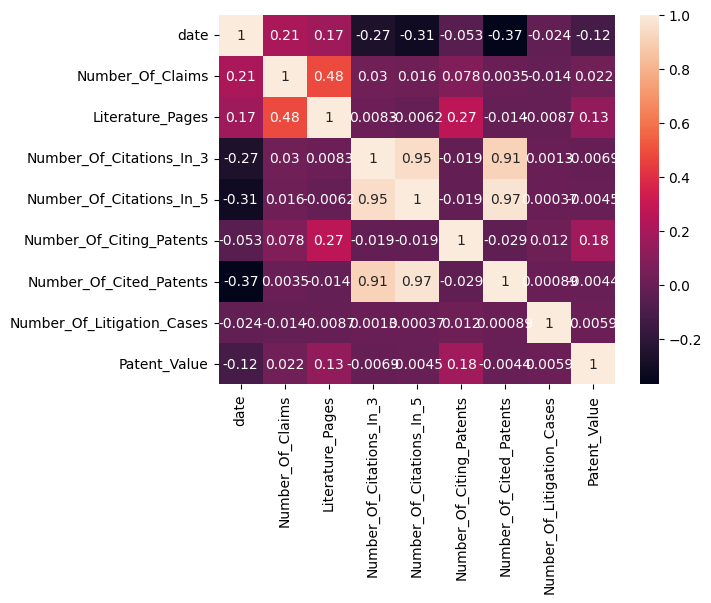

In [84]:
# 筛选出数值属性列
numeric_cols = df.select_dtypes(include=['int', 'float']).columns

# 计算相关性矩阵，并绘制热力图
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [85]:
cat_columns=["Industry_Chain_Position","Level1_Technology_Branch","Patent_Type","Patent_Validity","Province_Code"]
num_columns=["Number_Of_Claims","Literature_Pages","Number_Of_Citations_In_3","Number_Of_Citations_In_5","Number_Of_Citing_Patents","Number_Of_Cited_Patents","Number_Of_Litigation_Cases","date"]

In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [87]:
oneHotEncoder=OneHotEncoder(drop='first')
cat_features=oneHotEncoder.fit_transform(df[cat_columns]).toarray()
cat_features.shape

(72402, 50)

In [88]:
standardScaler=StandardScaler()
num_features=standardScaler.fit_transform(df[num_columns])
num_features.shape

(72402, 8)

In [89]:
x=np.hstack([cat_features,num_features])
x.shape

(72402, 58)

In [90]:
y=df["Patent_Value"].to_numpy()
len(y)

72402

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((57921, 58), (14481, 58), (57921,), (14481,))

In [92]:
lr_model=LinearRegression()

In [93]:
lr_model.fit(x_train,y_train)

LinearRegression()

In [94]:
lr_model.score(x_test,y_test)

0.17888877481229315

In [95]:
lr_model.score(x_train,y_train)

0.20702534270346773

In [96]:
y_lrEstimate=lr_model.predict(x_test)
y_lrEstimate

array([  5894.24482116,  -1804.80083983, -12868.76656876, ...,
       118070.76948952,  -2263.11310478,  15894.1589676 ])

In [97]:
# 评估模型性能
# mse = mean_squared_error(y_test, y_lrEstimate)
# mse

In [100]:
lrData = {'Patent_Value': y_test, 'Estimate_Value': y_lrEstimate}
lrResult = pd.DataFrame(lrData)

In [104]:
# np.percentile(y_test,y_lrEstimate)

ValueError: Percentiles must be in the range [0, 100]

In [102]:
sorted_lrResult = lrResult.sort_values(by='Patent_Value')

# 计算每个分位点对应的索引
n = len(sorted_lrResult)
percentiles = [0, 25, 50, 75, 100]
percentile_indices = [int(p * n / 100) for p in percentiles]

# 获取各分位点的真实值和预估值
real_values = sorted_lrResult['Patent_Value'].values
predicted_values = sorted_lrResult['Estimate_Value'].values

# 计算平方差均值
mse_values = np.square(real_values - predicted_values)
mse_percentiles = [mse_values[i:j].mean() for i, j in zip(percentile_indices, percentile_indices[1:])]

# 打印结果
for p, mse in zip(percentiles[1:], mse_percentiles):
    print(f'{p}% Patent_Value and Estimate_Value MSE: {mse}')

25% RealValue and PredictedValue MSE: 1354728776.9721727
50% RealValue and PredictedValue MSE: 1476358616.1606889
75% RealValue and PredictedValue MSE: 1088383282.8424366
100% RealValue and PredictedValue MSE: 40303369544.89626


In [21]:
lrResult.to_excel("./Data/lrResult.xlsx", index=False)
lrResult.to_csv("./Data/lrResult.CSV", index=False)

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [23]:
random_model=RandomForestRegressor(n_estimators=300,random_state=42,n_jobs=-1)

In [24]:
random_model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=42)

In [25]:
random_model.score(x_train,y_train)

0.9545354938218393

In [26]:
random_model.score(x_test,y_test)

0.7652595887200319

In [27]:
y_rfEstimate=random_model.predict(x_test)
y_rfEstimate

array([3346.21388889, 3697.66666667, 3428.        , ..., 3481.        ,
       3464.8531746 , 3510.        ])

In [28]:
mse = mean_squared_error(y_test, y_rfEstimate)
mse

3490334367.380462

In [29]:
y_test

array([3300, 3400, 3400, ..., 3600, 3400, 3500], dtype=int64)

In [30]:
rfData = {'Patent_Value': y_test, 'Estimate_Value': y_rfEstimate}
rfResult = pd.DataFrame(rfData)

In [31]:
rfResult.to_excel("./Data/rfResult.xlsx", index=False)
rfResult.to_csv("./Data/rfResult.CSV", index=False)

In [32]:
from sklearn.svm import SVR


In [33]:
# 创建SVM模型，选择核函数为'linear'
svmlr_model = SVR(kernel='linear')

# 训练模型
svmlr_model.fit(x_train, y_train)

# 预测测试集的价值
y_svmlrEstimate = svmlr_model.predict(x_test)

# 评估模型性能
mse = mean_squared_error(y_test, y_svmlrEstimate)
mse

14892043962.85444

In [34]:
svmlrData = {'Patent_Value': y_test, 'Estimate_Value': y_svmlrEstimate}
svmlrResult = pd.DataFrame(svmlrData)

In [35]:
svmlrResult.to_excel("./Data/svmlrResult.xlsx", index=False)
svmlrResult.to_csv("./Data/svmlrResult.CSV", index=False)

In [36]:
# 创建SVM模型，选择核函数为'linear'
svmpl_model = SVR(kernel='poly')

# 训练模型
svmpl_model.fit(x_train, y_train)

# 预测测试集的价值
y_svmplEstimate = svmpl_model.predict(x_test)

# 评估模型性能
mse = mean_squared_error(y_test, y_svmplEstimate)
mse

15153885376.153416

In [37]:
svmplData = {'Patent_Value': y_test, 'Estimate_Value': y_svmplEstimate}
svmplResult = pd.DataFrame(svmplData)

In [38]:
svmlrResult.to_excel("./Data/svmplResult.xlsx", index=False)
svmlrResult.to_csv("./Data/svmplResult.CSV", index=False)

In [39]:
# 创建SVM模型，选择核函数为'linear'
svmrbf_model = SVR(kernel='rbf')

# 训练模型
svmrbf_model.fit(x_train, y_train)

# 预测测试集的价值
y_svmrbfEstimate = svmrbf_model.predict(x_test)

# 评估模型性能
mse = mean_squared_error(y_test, y_svmrbfEstimate)
mse

15172846091.05127

In [40]:
svmrbfData = {'Patent_Value': y_test, 'Estimate_Value': y_svmrbfEstimate}
svmrbfResult = pd.DataFrame(svmrbfData)

In [41]:
svmrbfResult.to_excel("./Data/svmrbfResult.xlsx", index=False)
svmrbfResult.to_csv("./Data/svmrbfResult.CSV", index=False)

In [42]:
# 创建SVM模型，选择核函数为'linear'
svmsgd_model = SVR(kernel='sigmoid')

# 训练模型
svmsgd_model.fit(x_train, y_train)

# 预测测试集的价值
y_svmsgdEstimate = svmsgd_model.predict(x_test)

# 评估模型性能
mse = mean_squared_error(y_test, y_svmsgdEstimate)
mse

15168298724.8887

In [43]:
svmsgdData = {'Patent_Value': y_test, 'Estimate_Value': y_svmsgdEstimate}
svmsgdResult = pd.DataFrame(svmsgdData)

In [44]:
svmrbfResult.to_excel("./Data/svmsgdResult.xlsx", index=False)
svmrbfResult.to_csv("./Data/svmsgdResult.CSV", index=False)

In [45]:
# batch_size = 5000  # 设置批次大小
# # 在外部创建模型
# # random_model=RandomForestRegressor(n_estimators=300,random_state=42,n_jobs=-1)
# lr_model=LinearRegression()
# for start_idx in range(0, len(df), batch_size):
#     batch = df.iloc[start_idx : start_idx + batch_size]  # 获取当前批次的数据
#     # 在这里进行你的操作，例如 OneHot 编码、模型训练等
#     oneHotEncoder=OneHotEncoder(drop='first')
#     cat_features=oneHotEncoder.fit_transform(batch[cat_columns]).toarray()
#     standardScaler=StandardScaler()
#     num_features=standardScaler.fit_transform(batch[num_columns])
#     x=np.hstack([cat_features,num_features])
#     y=batch["Patent_Value"].to_numpy()
# #     x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0)
#     lr_model.fit(x,y)
#     # 将处理后的结果保存在一个列表中，或者根据需求合并到总的结果中
#     # ...

# # 将所有批次的处理结果合并
# # final_result = pd.concat(list_of_results)

In [46]:
# print("SUCCESS")

In [47]:
# import joblib

# # # 保存模型为 model.pkl
# # joblib.dump(random_model, './model/random_model.pkl')
# joblib.dump(lr_model, './model/lr_model.pkl')

In [48]:
# testData_size = 5000
# start_idex=0
# testData = df.iloc[start_idex : start_idex + testData_size]  # 获取当前批次的数据

In [49]:
# testData.info()
# testData.head(5)

In [50]:
# oneHotEncoder=OneHotEncoder(drop='first')
# cat_features=oneHotEncoder.fit_transform(testData[cat_columns]).toarray()
# cat_features

In [51]:
# from sklearn.preprocessing import StandardScaler
# standardScaler=StandardScaler()
# num_features=standardScaler.fit_transform(testData[num_columns])
# num_features

In [52]:
# x=np.hstack([cat_features,num_features])
# x

In [53]:
# y=testData["Patent_Value"].to_numpy()
# y

In [54]:
# from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)
# x_train.shape,x_test.shape,y_train.shape,y_test.shape

In [55]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import accuracy_score
# random_model=RandomForestRegressor(n_estimators=300,random_state=42,n_jobs=-1)
# random_model.fit(x_train,y_train)

In [56]:
# random_model.score(x_train,y_train)

In [57]:
# random_model.score(x_test,y_test)

In [58]:
# from sklearn.linear_model import LinearRegression
# lr_model=LinearRegression()
# lr_model.fit(x_train,y_train)

In [59]:
# lr_model.predict()

In [60]:
# import joblib

# # 保存模型为 model.pkl
# joblib.dump(random_model, './model/random_model.pkl')
# joblib.dump(lr_model, './model/lr_model.pkl')

In [61]:
# df=pd.read_csv("./Data/testData.CSV")
# df.info()
# df.head(5)

In [62]:
# oneHotEncoder=OneHotEncoder(drop='first')
# cat_feature=oneHotEncoder.fit_transform(df[cat_columns]).toarray()
# len(cat_feature)

In [63]:
# standardScaler=StandardScaler()
# num_feature=standardScaler.fit_transform(df[num_columns])
# len(num_feature)

In [64]:
# x_test=np.hstack([cat_features,num_features])
# len(x_test)

In [65]:
# y_test=df["Patent_Value"].to_numpy()
# len(y_test)

In [66]:
# lr_model.score(x_test,y_test)